In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from sklearn.model_selection import train_test_split

Liste des types de POI furniture_store, laundry, bakery, cafe, home_goods_store, clothing_store, atm, lodging, night_club, convenience_store, restaurant, bar


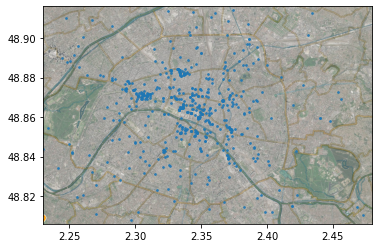

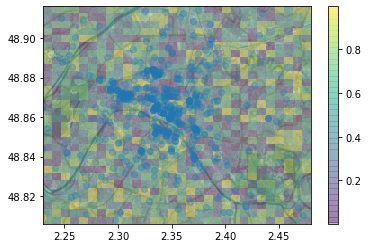

In [2]:
plt.ion()
parismap = mpimg.imread('data/paris-48.806-2.23--48.916-2.48.jpg')

## coordonnees GPS de la carte
xmin,xmax = 2.23,2.48   ## coord_x min et max
ymin,ymax = 48.806,48.916 ## coord_y min et max

def show_map():
    plt.imshow(parismap,extent=[xmin,xmax,ymin,ymax],aspect=1.5)
    ## extent pour controler l'echelle du plan

poidata = pickle.load(open("data/poi-paris.pkl","rb"))
## liste des types de point of interest (poi)
print("Liste des types de POI" , ", ".join(poidata.keys()))

## Choix d'un poi
typepoi = "night_club"

## Creation de la matrice des coordonnees des POI
geo_mat = np.zeros((len(poidata[typepoi]),2))
for i,(k,v) in enumerate(poidata[typepoi].items()):
    geo_mat[i,:]=v[0]

## Affichage brut des poi
show_map()
## alpha permet de regler la transparence, s la taille
plt.scatter(geo_mat[:,1],geo_mat[:,0],alpha=0.8,s=3)


###################################################

# discretisation pour l'affichage des modeles d'estimation de densite
steps = 30
xx,yy = np.meshgrid(np.linspace(xmin,xmax,steps),np.linspace(ymin,ymax,steps))
grid = np.c_[xx.ravel(),yy.ravel()]

# A remplacer par res = monModele.predict(grid).reshape(steps,steps)
res = np.random.random((steps,steps))
plt.figure()
show_map()
plt.imshow(res,extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.3,origin = "lower",aspect='auto')
plt.colorbar()
plt.scatter(geo_mat[:,1],geo_mat[:,0],alpha=0.3)
plt.show()

In [47]:
pos = [p[0] for p in poidata[typepoi].values()]
pos

[(48.8753446, 2.3167161),
 (48.86212819999999, 2.3422869),
 (48.8798307, 2.3541009),
 (48.8740043, 2.292678599999999),
 (48.8586372, 2.3691235),
 (48.8817069, 2.3374268),
 (48.8681965, 2.3897587),
 (48.887536, 2.389261),
 (48.87067829999999, 2.3504638),
 (48.8794878, 2.355478999999999),
 (48.864509, 2.356791),
 (48.8390247, 2.3706171),
 (48.8295187, 2.3549885),
 (48.86929079999999, 2.4565235),
 (48.83225909999999, 2.2673208),
 (48.8528666, 2.3422929),
 (48.840072, 2.324211999999999),
 (48.8739924, 2.2929159),
 (48.8659149, 2.3487515),
 (48.8690238, 2.3745716),
 (48.83662349999999, 2.375350999999999),
 (48.8679419, 2.3153001),
 (48.85512019999999, 2.341555199999999),
 (48.8562918, 2.3582749),
 (48.8678544, 2.3735535),
 (48.8835539, 2.3697267),
 (48.88127839999999, 2.334294),
 (48.8720048, 2.336175099999999),
 (48.843415, 2.3215707),
 (48.84708, 2.386855),
 (48.8716253, 2.3044092),
 (48.8790477, 2.3294683),
 (48.81030759999999, 2.472599),
 (48.86275430000001, 2.3490952),
 (48.8685584, 2.

In [48]:
def meth_histogramme(positions,steps):
    xlist = np.linspace(xmin,xmax,steps+1)
    ylist = np.linspace(ymin,ymax,steps+1)
    dimx,dimy = (xmax-xmin)/steps , (ymax-ymin)/steps
    mat = np.zeros((steps,steps))
    for y,x in positions:
        maty = np.argmax((ylist-y)>0)-1
        matx = np.argmax((xlist-x)>0)-1
        mat[maty,matx]+=1
    return mat/(len(positions)*dimx*dimy)

In [70]:
steps=100

In [71]:
res = meth_histogramme(pos,steps)

In [72]:
res.shape

(100, 100)

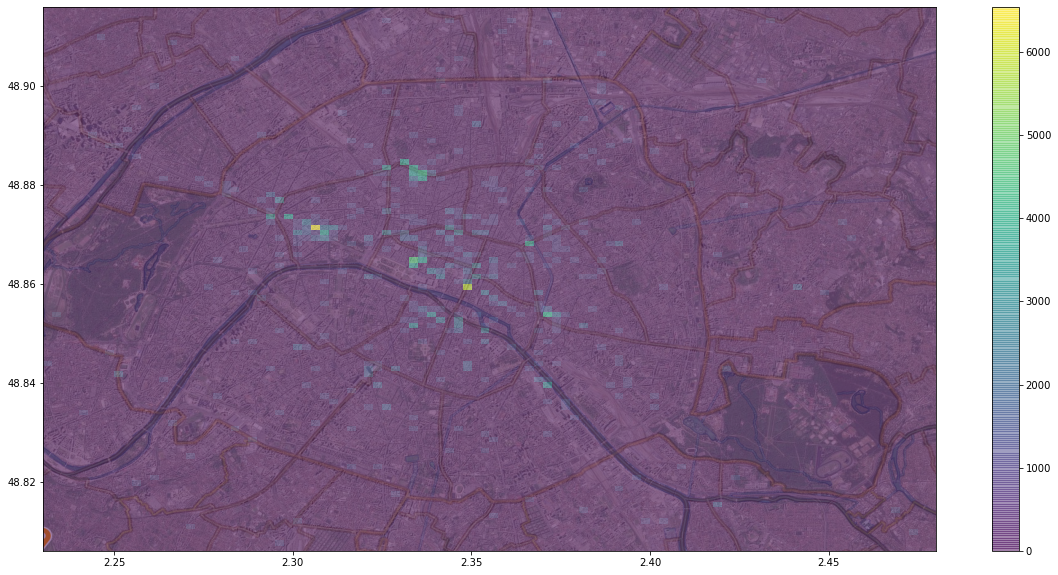

In [73]:
plt.figure(figsize=(20,10))
show_map()
#plt.scatter(geo_mat[:,1],geo_mat[:,0],alpha=0.03)
plt.imshow(res,extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.5,origin = "lower",aspect="auto")
plt.colorbar()
plt.show()

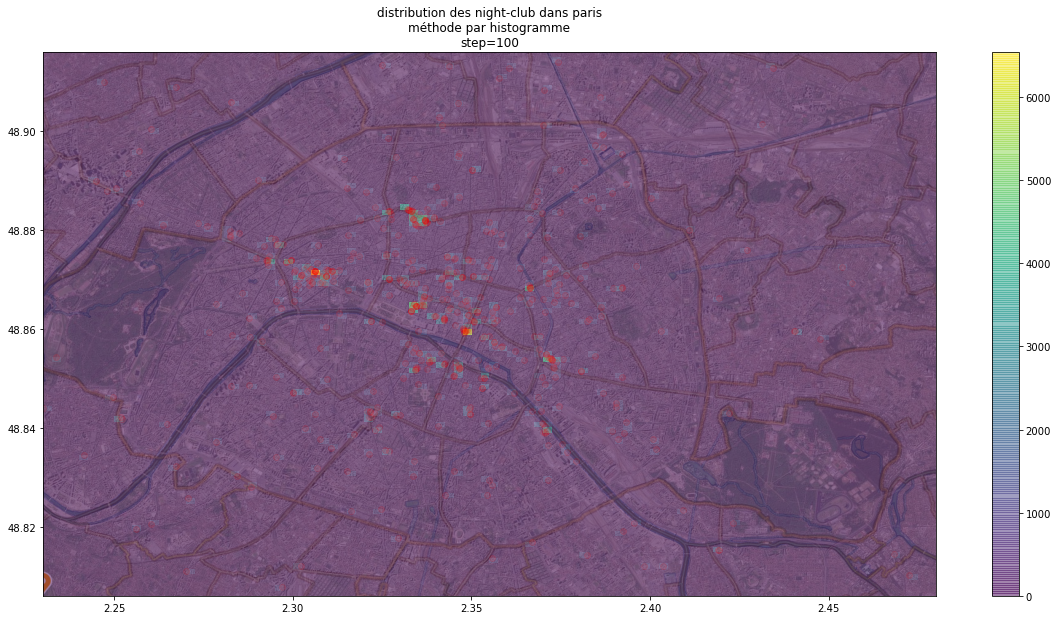

In [75]:
plt.figure(figsize=(20,10))
show_map()
plt.scatter(geo_mat[:,1],geo_mat[:,0],alpha=0.1,color='red')
plt.imshow(res,extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.5,origin = "lower",aspect="auto")
plt.title('distribution des night-club dans paris\nméthode par histogramme\nstep=100')
plt.colorbar()
plt.show()

leger decalage c'est le point de la methode hist

In [41]:
def fenParzen(x0,positions,longCote):
    x0tmp = np.array(x0)
    somme = 0
    for pos in positions:
        xtmp = np.array(pos)
        tmp = (xtmp-x0tmp)/longCote
        if (np.abs(tmp)<=0.5).all():
            #on est dans l'hypercube donc +1
            somme += 1
    return somme/( (longCote**len(x0)) * len(positions))

def methode_noyau(positions,listex0,noyau):
    """
    :possition: liste des positions des POI
    :listex0: liste des point d'ineteret autour des quels on va pouvoir estimer la densité
    :noyau: fonction qui calcul l'estimation de la densite en x0
    """
    res = []
    for x0 in listex0:
        res.append(noyau(x0,positions))
    return res

In [104]:
pas = 0.001
listex0 = np.array([(y+(pas/2),x+(pas/2)) for y in np.arange(ymin,ymax,pas) for x in np.arange(xmin,xmax,pas)])
print(len(listex0))

27500


In [105]:
res = methode_noyau(pos,listex0,lambda x0,xs:fenParzen(x0,xs,0.02))

In [106]:
res = np.array(res).reshape((-1,int((xmax-xmin)/pas)))

In [107]:
res.shape

(110, 250)

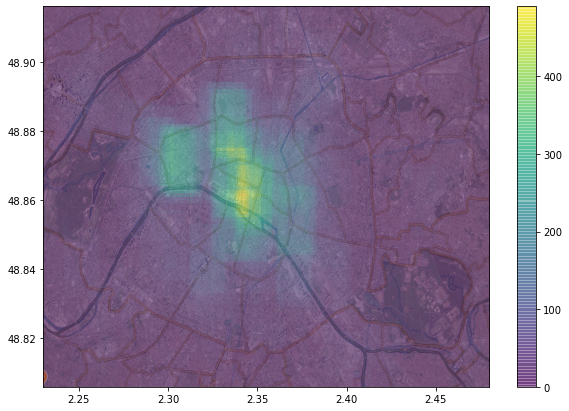

In [108]:
plt.figure(figsize=(10,7))
show_map()
#plt.scatter(geo_mat[:,1],geo_mat[:,0],alpha=0.1)
plt.imshow(res,extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.5,origin = "lower",aspect="auto")
plt.colorbar()
plt.show()

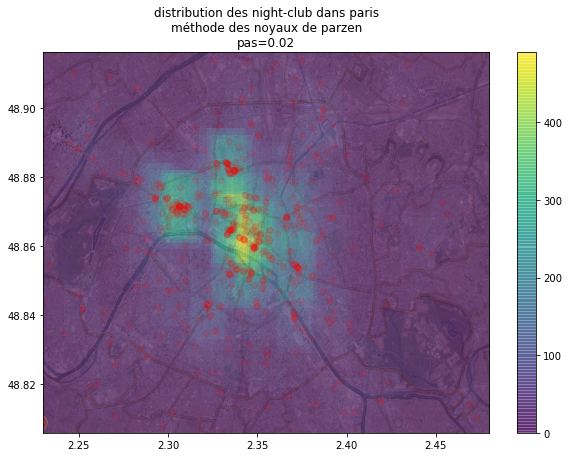

In [109]:
plt.figure(figsize=(10,7))
show_map()
plt.scatter(geo_mat[:,1],geo_mat[:,0],alpha=0.1,color="red")
plt.imshow(res,extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.6,origin = "lower",aspect="auto")
plt.title('distribution des night-club dans paris\nméthode des noyaux de parzen\npas=0.02')
plt.colorbar()
plt.show()

In [20]:
pos1d = np.random.rand(10000)*10
x1d = np.arange(0,10)

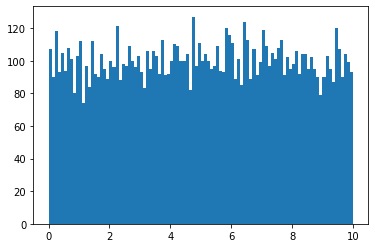

In [21]:
plt.hist(pos1d,bins=100)
plt.show()

In [22]:
listex01d = np.arange(0,10,0.1)

In [23]:
res = methode_noyau(pos1d.reshape(-1,1),listex01d.reshape(-1,1),lambda x0,xs:fenParzen(x0,xs,0.2))

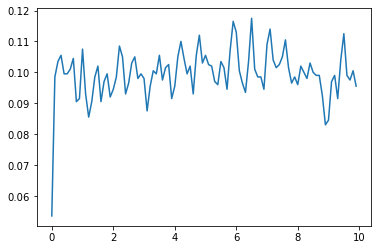

In [24]:
plt.plot(listex01d,res)
plt.show()

In [94]:
def noyau_gauss1d(x0,xs,hn):
    x0tmp = np.array(x0)
    xstmp = np.array(xs)
    v = hn**len(x0)
    xtmp = (xstmp-x0tmp)/hn
    tmp = ((2*np.pi)**-0.5) * np.exp(-0.5*xtmp**2)
    return np.sum(tmp)/(len(xs)*v)

In [95]:
res = methode_noyau(pos1d.reshape(-1,1),listex01d.reshape(-1,1),lambda x0,xs:noyau_gauss1d(x0,xs,0.2))

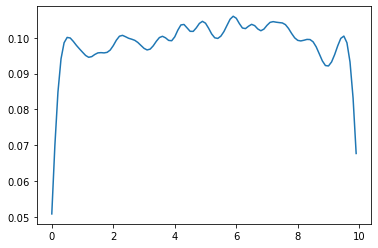

In [96]:
plt.plot(listex01d,res)
plt.show()

In [97]:
def noyau_gauss2d(x0,xs,hn):
    x0tmp = np.array(x0)
    xstmp = np.array(xs)
    v = hn**len(x0)
    xtmp = (xstmp-x0tmp)/hn
    cov = np.array([[1,0],[0,1]])
    tmp = np.zeros(xtmp.shape[0])
    for i in range(xtmp.shape[0]):
        tmp[i] = ((2*np.pi)**-0.5) * np.exp(-0.5*((xtmp[i]@cov)@xtmp[i]))
    return np.sum(tmp)/(len(xs)*v)

In [102]:
res = methode_noyau(pos,listex0,lambda x0,xs:noyau_gauss2d(x0,xs,0.01))
res = np.array(res).reshape((-1,int((xmax-xmin)/pas)))

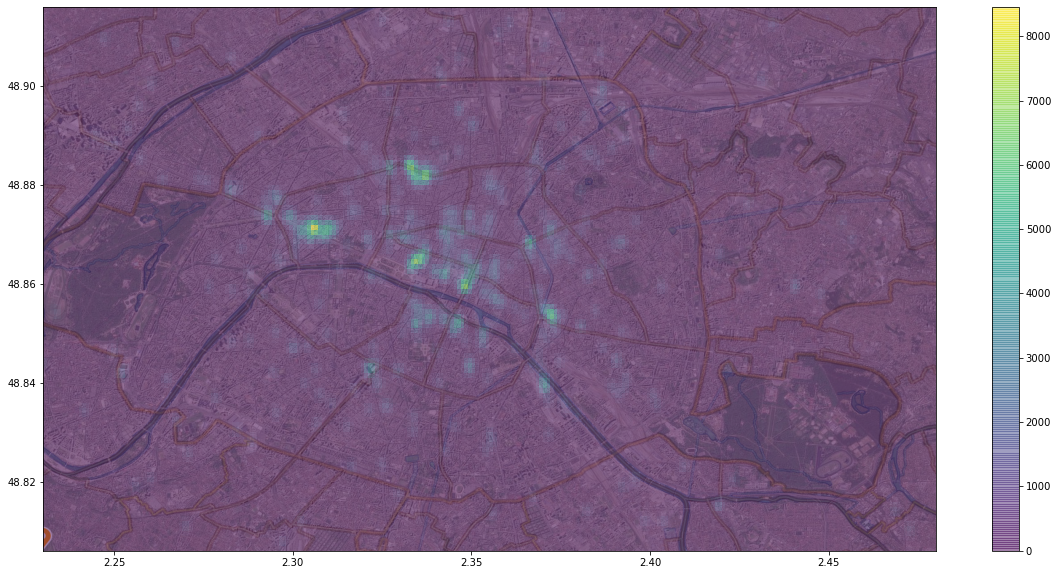

In [99]:
plt.figure(figsize=(20,10))
show_map()
#plt.scatter(geo_mat[:,1],geo_mat[:,0],alpha=0.05)
plt.imshow(res,extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.5,origin = "lower",aspect="auto")
plt.colorbar()
plt.show()

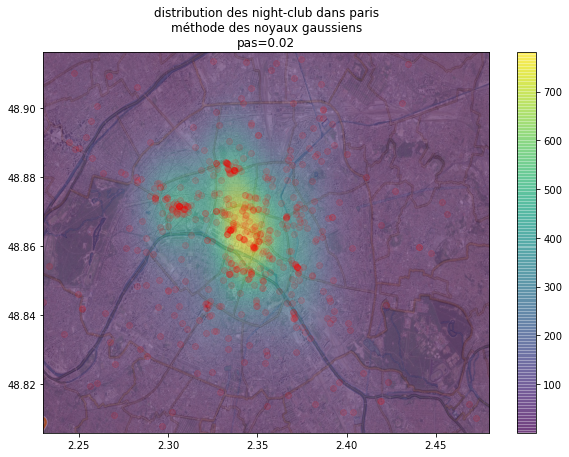

In [103]:
plt.figure(figsize=(10,7))
show_map()
plt.scatter(geo_mat[:,1],geo_mat[:,0],alpha=0.1,color='red')
plt.imshow(res,extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.5,origin = "lower",aspect="auto")
plt.title('distribution des night-club dans paris\nméthode des noyaux gaussiens\npas=0.02')
plt.colorbar()
plt.show()

In [32]:
def logVraissemblance(enstest,positions,h,noyau):
    res = np.zeros(len(enstest))
    for i in range(len(enstest)):
        x0 = enstest[i]
        res[i] = noyau(x0,positions,h)
    return np.sum(np.log(res))

In [33]:
pos2 = pos.copy()
np.random.shuffle(pos2)
postrain = pos2[:int(len(pos2)*0.9)]
enstest = pos2[int(len(pos2)*0.9):]
ps = [1/10**k for k in np.arange(0,4)]
vraissemblance = np.zeros(len(ps))
for i in range(len(ps)):
    h = ps[i]
    vraissemblance[i] = logVraissemblance(enstest,postrain,h,noyau_gauss2d)

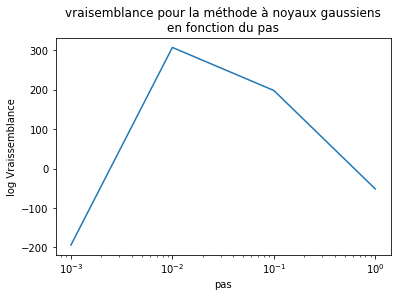

In [110]:
plt.plot(ps,vraissemblance)
plt.semilogx()
plt.xlabel('pas')
plt.ylabel('log Vraissemblance')
plt.title("vraisemblance pour la méthode à noyaux gaussiens\nen fonction du pas")
plt.show()